In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))


In [2]:


import pickle

list_file="/workdir/jupyter/tot_data_taking_data/datasetID_18_list.pickle"
#list_file="/workdir/jupyter/tot_data_taking_data/datasetID_1_list.pickle"
with open (list_file,'rb') as fp:


    #with open ('/workdir/jupyter/tot_data_taking_data/HV1600V_ptime_15_threshold_50_gain_4_boardsON_23.rootlist.pickle', 'rb') as fp:
    data_file_list = pickle.load(fp)
for f in data_file_list:
    print (f)


/workdir/jupyter/tot_data_taking_data/ID18_HV1600V_ptime_15_thr_30_gain_4_boardsON_0_sr_15.root


Welcome to JupyROOT 6.14/04
data file   , tot_mostprob signalcounts noisecounts sn_ratio significance
148.0 3.5924694730813703e+165 5.3865998224315775e+228
ID0_HV1600V_ptime_15_thr_50_gain_4_boardsON_0_sr_15. |  140.0 |  63.0 |  1.0 |  63.00 |  7.88 3592469473081370347065308091421278676927222484290599646729961940311853640074986287216322631272563875914836891794906295220528570520148246288119509906362447864631656448.00


<function matplotlib.pyplot.show(*args, **kw)>

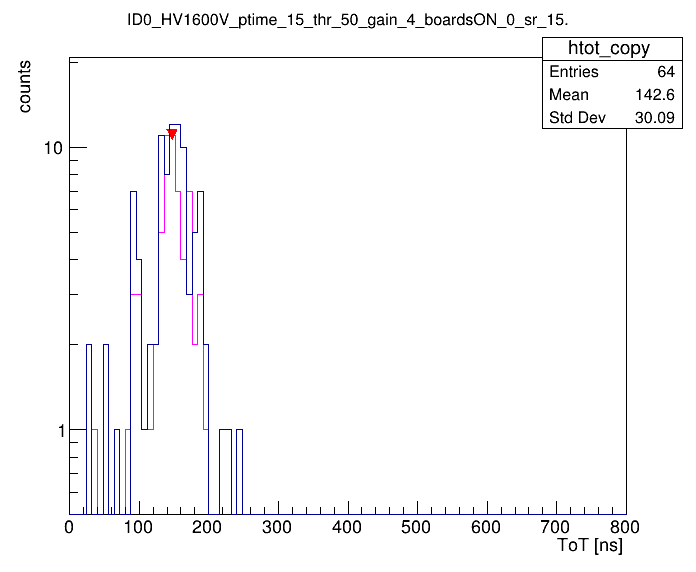

In [3]:

import ROOT
import pickle
import numpy as np 
import math
from matplotlib import pyplot as plt

#from ROOT import gInterpreter, gSystem
#gInterpreter.ProcessLine('#include "/workdir/my_event.h"')



##################################################
##               slurp root file                ##
##################################################
list_file="/workdir/jupyter/tot_data_taking_data/datasetID_0_list.pickle"
#list_file="/workdir/jupyter/tot_data_taking_data/datasetID_1_list.pickle"
with open (list_file,'rb') as fp:


    #with open ('/workdir/jupyter/tot_data_taking_data/HV1600V_ptime_15_threshold_50_gain_4_boardsON_23.rootlist.pickle', 'rb') as fp:
    data_file_list = pickle.load(fp)
#change parameter in filelist / quick&dirty:    
#data_file_list = [f.replace('threshold_10', 'threshold_40') for f in data_file_list]
# threshold_10 10 files
# threshold_15  5 files
# threshold_18  2 files
# threshold_30  11 files
# threshold_40   files



#f = ROOT.TFile("/workdir/tree_out.root".format(data_dir))
#tree = f.Get("TDC_1503")
#print("data entries TDC_1503: " + str(tree.GetEntries()))
i = -1
clist = [None]*100
print("data file   ,", "tot_mostprob", "signalcounts", "noisecounts", "sn_ratio", "significance")

tot_mostprob_list = []

for data_file in data_file_list:
    i += 1
    #if i == 30:
    #    break
    #print(data_file)
    f = ROOT.TFile("{:s}".format(data_file))
    tree = f.Get("joint_tree")
    #print("data entries: " + str(tree.GetEntries()))
    ## plot data:
    clist[i] = ROOT.TCanvas("myCanvasName"+str(i),str(data_file),700,600)
#     tree.Draw("tot>>htot2(300,0,300)","chan > 150301 && chan < 150303")
#     tree.Draw("tot>>htot(300,0,300)","chan > 035313 && chan < 035315","same")  
    tree.Draw("tot>>htot(100,0,800)","chan > 150307 && chan < 150309")
    tree.Draw("tot>>htot2(100,0,800)","chan > 035307 && chan < 035309","same")     
    tree.Draw("tot>>htot3(200,0,300)","chan > 035316 && chan < 035332","same")  
    tree.Draw("tot>>htot4(200,0,300)","chan > 150316 && chan < 150332","same")  
    clist[i].Draw()
    htot = f.Get("htot")
    htot2 = f.Get("htot2")
    htot3 = f.Get("htot3")
    htot4 = f.Get("htot4")
    clist[i].SetLogy()
    htot.GetXaxis().SetTitle("ToT [ns]")
    htot.GetYaxis().SetTitle("counts")
    htot.SetTitle(data_file.strip("workdir/jupyter/tot_data_taking_data"))
 
    

    #htot.ShowPeaks(2,"",0.5)
    spectrum_peaks = ROOT.TSpectrum(4);
    nfound_peaks = spectrum_peaks.Search(htot,2,"",0.5)  
    if nfound_peaks < 2: 
       nfound_peaks = spectrum_peaks.Search(htot,2,"",0.01)  
        
    if nfound_peaks > 0:
           xpeaks = spectrum_peaks.GetPositionX();
           tot_mostprob_noise = xpeaks[0]
           tot_mostprob_signal = xpeaks[1]
           print (xpeaks[0],xpeaks[1],xpeaks[2])
           sn_distance = math.fabs(tot_mostprob_noise-tot_mostprob_signal)
    else:
       sn_distance = -1
    clist[i].Draw()
    htot.SetLineColor(6)
    htot.DrawCopy("")
    htot2.DrawCopy("same")
    htot3.SetLineColor(2)
#     htot3.DrawCopy("same")
    htot4.SetLineColor(8)
#     htot4.DrawCopy("same")
    
    tot_mostprob = htot.GetXaxis().GetBinCenter(htot.GetMaximumBin())
    tot_mostprob_list += [ sn_distance ]
    signalcounts  = htot.Integral(htot.FindBin(50),htot.GetNbinsX())
    noisecounts   = htot.Integral(1,htot.FindBin(50))
    if noisecounts == 0:
        sn_ratio = -1
        significance = -1
    else:
        sn_ratio = signalcounts/noisecounts
        significance = signalcounts/np.sqrt(signalcounts+noisecounts)
    print(  htot.GetTitle() , "| ",  tot_mostprob,"| ", signalcounts,"| ", noisecounts,"| ", "{:.2f}".format(sn_ratio),"| ", "{:.2f}".format(significance),  "{:.2f}".format(sn_distance))
 
plt.scatter(range(0,len(tot_mostprob_list)),tot_mostprob_list)
plt.yscale('log')
plt.show


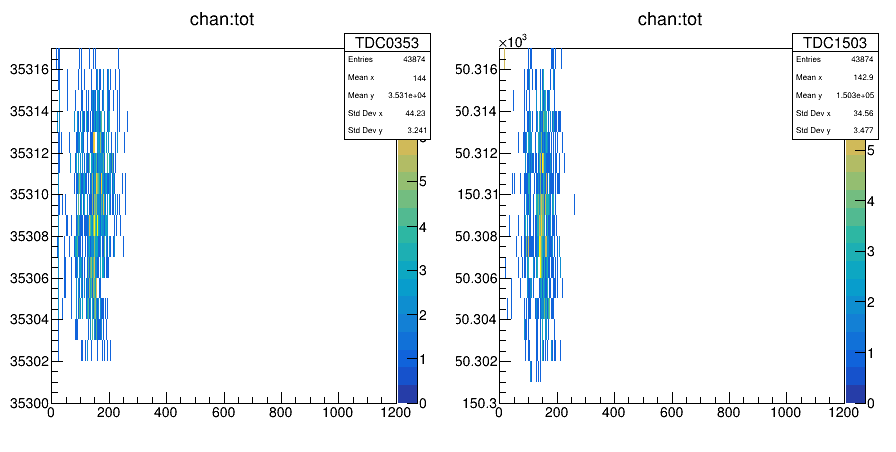

In [4]:
##################################################
##             overview TDC 0x0351              ##
##################################################
c = ROOT.TCanvas("myCanvasName","The Canvas Title",900,480)
c.Divide(2,1)

tdc=353
disp_channels = 17
#tree.Draw("chan:t1","","lego2")
c.cd(1)
tree.Draw("chan:tot>>TDC0353(400,0,1200,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","colz")
c.SetLogz(1)
c.Draw()
c.cd(2)
tdc=1503
tree.Draw("chan:tot>>TDC1503(400,0,1200,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","colz")
c.SetLogz(1)
c.Draw()
